## Comunicate Data Findings

### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area


## Table of Contents

- [Data Wrangling](#wrangling)
- [Data Cleaning](#cleaning)
- [Data Exploration and Visualization](#analysis)
    - [univariate exploration](#analysis1)
    - [bivariate exploration](#analysis2)
    - [multivariate exploration](#analysis3)
  

<a id='wrangling'></a>
## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile
import glob
%matplotlib inline

In [39]:
def creatDir(path=""):
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

In [57]:
def downloader(years=[],city="fordgobike",cloudFolder="fordgobike-data"):
    creatDir(city)
    for year in years:
        url = f"https://s3.amazonaws.com/{cloudFolder}/{year}-{city}-tripdata.csv.zip" 
        #get response
        response = requests.get(url)
        #save file
        with open(f"{city}\\{year}-{city}-tripdata.csv.zip", mode = "wb") as file:
            file.write(response.content)

In [21]:
#loop over month of the year 2018
year_data = [x for x in range(201801, 201813)]
downloader(years=year_data)

In [ ]:
#downloader(years=year_data,city="citibike",cloudFolder="tripdata")

In [39]:
def zipExtractor(dirctory=""):  
    files = glob.glob(f"{dirctory}\\*.zip")
    #loop over file names
    for x in files:
        with zipfile.ZipFile(x,'r') as zip_ref:
             zip_ref.extractall(dirctory)

In [40]:
#dirs=[".\\fordgobike",".\\citibike"]
#for dirc in dirs:    
    #zipExtractor(dirc)
zipExtractor(".\\fordgobike")

In [2]:
def collector(folder_path=""):
    all_files = glob.glob(folder_path + "\\*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame

In [3]:
bike_df=collector(folder_path=".\\fordgobike")

In [56]:
#ny_bike_df=collector(folder_path=".\\citibike")

<a id='cleaning'></a>
## Data Cleaning

In [4]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [85]:
bike_df[bike_df.start_station_id.isnull()==True].shape[0]

11771

In [90]:
bike_df[bike_df.start_station_name.isnull()==True].shape[0]

11771

In [86]:
bike_df[bike_df.member_gender.isnull()==True].shape[0]

110367

In [87]:
bike_df[bike_df.member_birth_year.isnull()==True].shape[0]

110718

as we can see there is a lot of missing data in this dataSet but after all this data is about bike trip so it's depend on the analysis that we want to do 

we need to delete row with null value in `member_birth_year`

In [6]:
bike_df.dropna(subset=['member_birth_year'],inplace=True)

In [8]:
bike_df[bike_df.member_birth_year.isnull()==True].shape[0]

0

we can see that the `start_time`, `end_time` are of type object so we need to do some data type changing


In [10]:
# data cleaning
bike_df.start_time=pd.to_datetime(bike_df.start_time)
bike_df.end_time=pd.to_datetime(bike_df.end_time)

In [11]:
bike_df.duration_sec=bike_df.duration_sec.astype(float)

we need to creat an attribut for the `age`

In [12]:
bike_df["age"] = bike_df["member_birth_year"].apply(lambda x: 2018 - int(x))

In [13]:
#greate
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753003 entries, 0 to 1863719
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  age                      int64         
dtypes: datetime64[ns](2), float

In [98]:
(bike_df.start_time.min(), bike_df.start_time.max())

(Timestamp('2018-01-01 00:01:53.847000'),
 Timestamp('2018-12-31 23:59:12.097000'))

as we can see that our dataset is complete for the year 2018

In [49]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,1.753003e+06,1.741556e+06,1.753003e+06,1.753003e+06,1.741556e+06,1.753003e+06,1.753003e+06,1.753003e+06,1.753003e+06,1.753003e+06
mean,7.777800e+02,1.204426e+02,3.776643e+01,-1.223482e+02,1.189243e+02,3.776653e+01,-1.223476e+02,2.305049e+03,1.983088e+03,3.491204e+01
std,1.983979e+03,1.001721e+02,1.067133e-01,1.684108e-01,1.001915e+02,1.065823e-01,1.679882e-01,1.292329e+03,1.044289e+01,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03,1.800000e+01
25%,3.440000e+02,3.600000e+01,3.777041e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.228000e+03,1.978000e+03,2.700000e+01
50%,5.430000e+02,8.900000e+01,3.778107e+01,-1.223971e+02,8.900000e+01,3.778107e+01,-1.223959e+02,2.347000e+03,1.985000e+03,3.300000e+01
75%,8.410000e+02,1.870000e+02,3.779625e+01,-1.222830e+02,1.860000e+02,3.779728e+01,-1.222865e+02,3.343000e+03,1.991000e+03,4.000000e+01
max,8.628100e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03,1.370000e+02


<a id='analysis'></a>
## Data Exploration and Visualization


<a id='analysis1'></a>
### univariate exploration

if we want to know how did the number of trip evolve per mounth for the year 2018

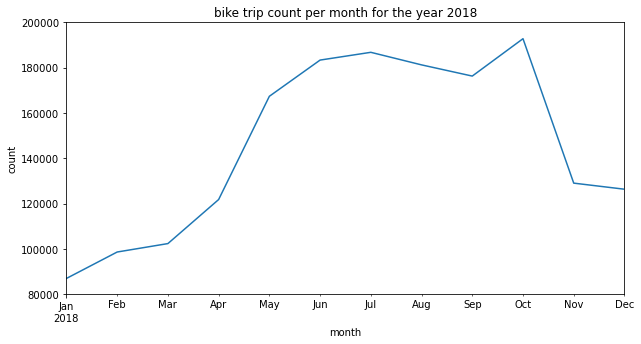

In [51]:
plt.figure(figsize=[10,5])
bike_df.set_index('start_time').resample('M').count()['user_type'].plot()
plt.title("bike trip count per month for the year 2018")
plt.ylabel('count')
plt.xlabel('month')
yticks =[x for x in range(80000,200000+1,20000)]
plt.yticks(yticks,yticks);

**comments on the plot :**
    - we see an sharp  increasing  in the number of trip from janury to may 
    - from may to october the number of trips still at a high number
    - we can argue about that, people are more likely yo use bike in the summer of on a vecation specialy in an urban area where people are more likely to use subways

if we want the bike trips count per user type for the year 2018

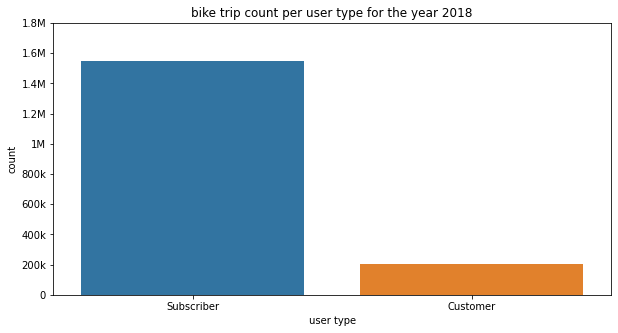

In [52]:
plt.figure(figsize=[10,5])
sb.countplot(data=bike_df, x='user_type')
plt.xlabel('number of tribike_share_for_all_tripp')
plt.xlabel('user type')
yticks =[x for x in range(0,1800000+1,200000)]
plt.title("bike trip count per user type for the year 2018")
yticks_lab =["0","200k","400k","600k","800k","1M","1.2M","1.4M","1.6M","1.8M"]
plt.yticks(yticks,yticks_lab);

**comments on the plot :**
    - as we can see from the barchart people who use bike regularly `Subscriber` are the people who make the vast majority of trips around 1.6 milion.
    - compared the the customer who make much more less trips
    

how many trip are made by members who are enrolled in the Bike Share for All program for low-income residents?

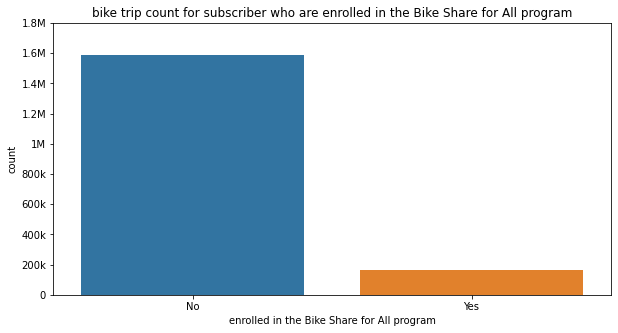

In [53]:
plt.figure(figsize=[10,5])
sb.countplot(data=bike_df, x='bike_share_for_all_trip')
plt.xlabel('number of trip')
plt.xlabel('enrolled in the Bike Share for All program')
yticks =[x for x in range(0,1800000+1,200000)]
plt.title("bike trip count for subscriber who are enrolled in the Bike Share for All program")
yticks_lab =["0","200k","400k","600k","800k","1M","1.2M","1.4M","1.6M","1.8M"]
plt.yticks(yticks,yticks_lab);

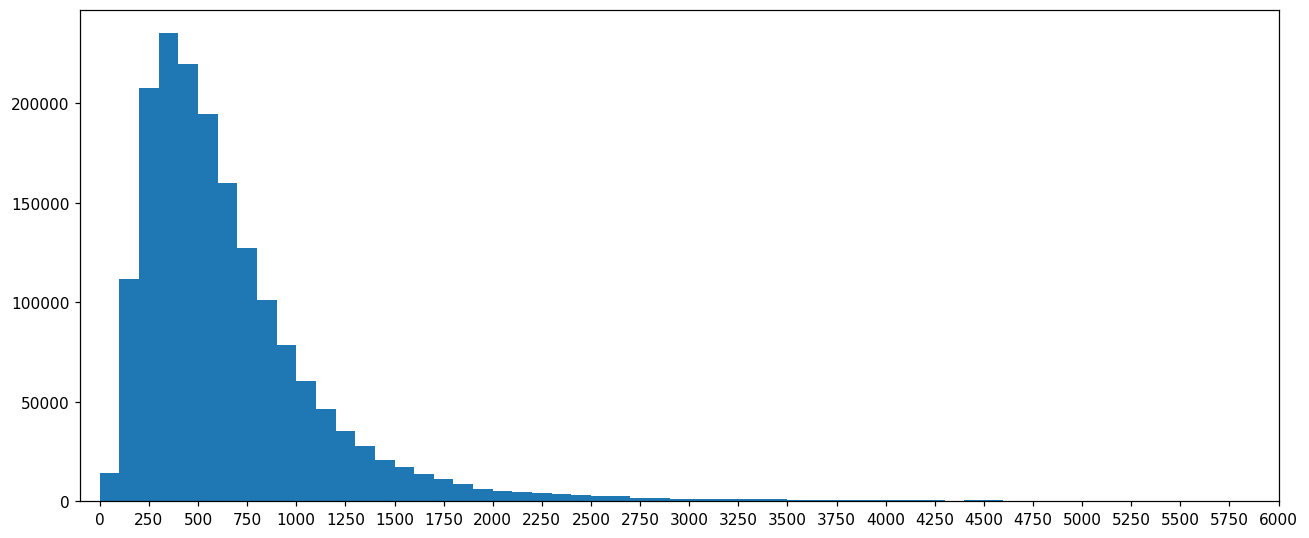

In [18]:
bin_size = 100
bins = np.arange(0,bike_df.duration_sec.max()+bin_size,bin_size)
fig, axes = plt.subplots(figsize = (12,5), dpi = 110)
plt.hist(bike_df.duration_sec, bins = bins);
plt.xticks(ticks = [x for x in range(0,7000,250)])
plt.xlim(-100,6000);
plt.tight_layout()

Text(0.5, 1.0, 'count plot for trip by user age')

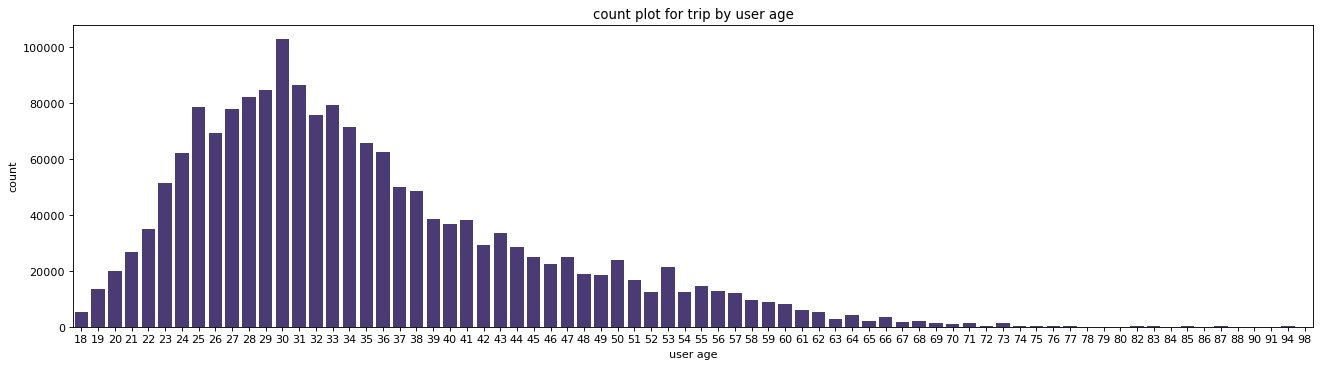

In [37]:
fig, ax = plt.subplots(figsize = (20,5), dpi = 80)
color = sb.color_palette("viridis")[0]
sb.countplot(x = "age", data = bike_df.query("age != 2018 and age < 100").sort_values("age"),color=color);
plt.xlabel('user age')
plt.title('count plot for trip by user age')

**comments on the plot :**
    - as we can see from the count plot the disribution of user age is largly between 18-60 years old
    

<a id='analysis2'></a>
### bivariate exploration

In [102]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284.0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422.0,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576.0,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076.0,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966.0,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [103]:
# get the top 10 city by value counts 'apparently pandas does the sorting for you' 
sub_station_df = bike_df.loc[bike_df['start_station_name'].isin(bike_df.start_station_name.value_counts()[:10].index)]

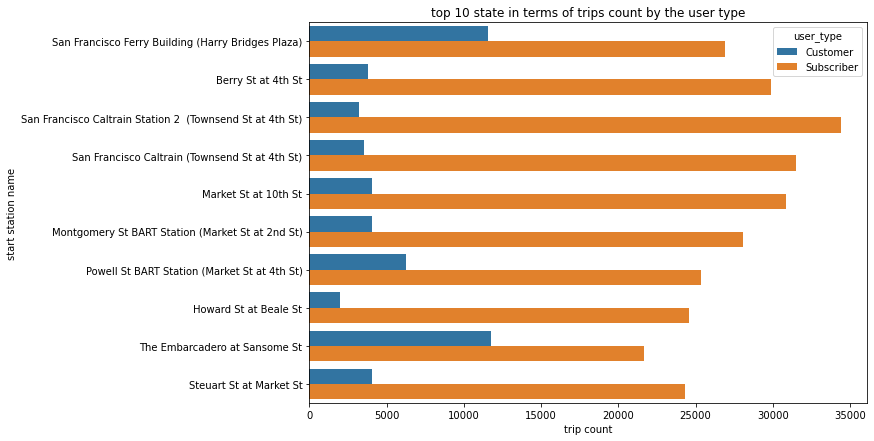

In [104]:
plt.figure(figsize=[10,7])
sb.countplot(data = sub_station_df, hue= 'user_type', y = 'start_station_name' )
plt.ylabel('start station name')
plt.xlabel('trip count')
plt.title("top 10 state in terms of trips count by the user type");
#plt.xticks(rotation = 90)

**comments on the plot :**
    - as we can see from the clustered barchart San Francisco Caltrain Station 2 (Townsend St at 4th St) has the highest number of trips done by subscriber type user.
    - otherwise The Embarcadero at Sansome St station has the highest number of Customer type user compared the overall number of trips in this station
    

In [105]:
#IQR = Q₃ − Q₁   for the duration_sec attribute
IQR =938.0 -382.0

In [106]:
#this just some old technique to detect outliers
outliers_free_df = bike_df.loc[(bike_df['duration_sec'] <= 1.5*IQR )]

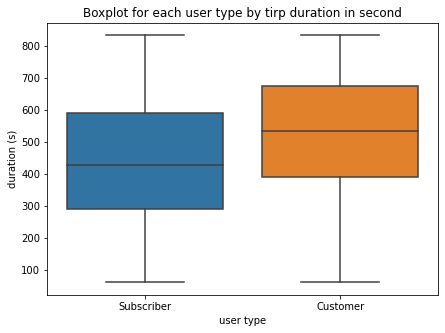

In [158]:
plt.figure(figsize=[7,5])
sb.boxplot(data = outliers_free_df, x = 'user_type', y = 'duration_sec')
plt.xlabel('user type')
plt.ylabel('duration (s)')
plt.title('Boxplot for each user type by tirp duration in second');

**comments on the plot :**
    - as we can see from the box that the median of duration for Customer type is a little ahead from the median of the Subscriber type
    

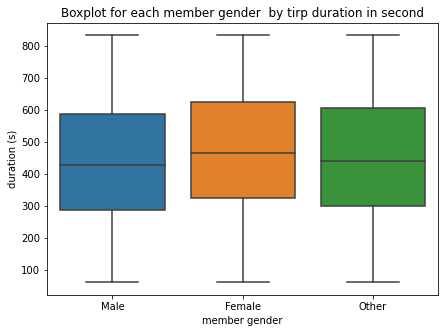

In [157]:
plt.figure(figsize=[7,5])
sb.boxplot(data = outliers_free_df, x = 'member_gender', y = 'duration_sec')
plt.xlabel('member gender')
plt.ylabel('duration (s)')
plt.title('Boxplot for each member gender  by tirp duration in second');

**comments on the plot :**
    - as we can see from the box that the median of duration for the Female gender  is a little ahead from the median of the other genders

In [22]:
bike_avg_gp = bike_df.groupby(bike_df['start_time'].dt.to_period("M")).mean()

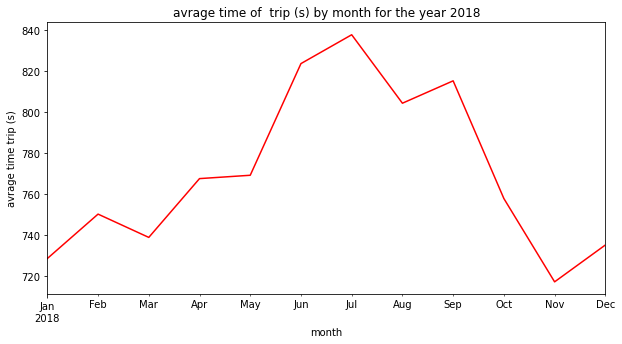

In [23]:
plt.figure(figsize=[10,5])
bike_avg_gp['duration_sec'].plot(color="red")
plt.xlabel('month')
plt.ylabel('avrage time trip (s)')
plt.title('avrage time of  trip (s) by month for the year 2018');

**comments on the plot :**
    - as we can see from the linechart people take longer trip in the summer 

    

In [119]:
#bike_df.bike_id.value_counts()
bike_need_replace_df = bike_df.loc[bike_df['bike_id'].isin(bike_df.bike_id.value_counts()[:10].index)]

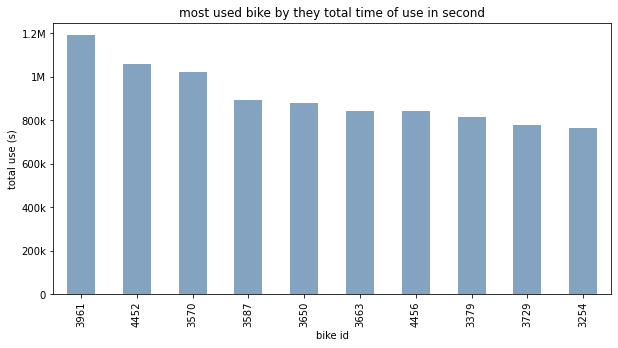

In [130]:
plt.figure(figsize=[10,5])
cat_means = bike_need_replace_df.groupby(['bike_id']).sum()['duration_sec'].sort_values(ascending=False).plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel('total use (s)')
plt.xlabel('bike id')
plt.title('most used bike by they total time of use in second')
yticks=[_ for _ in range(0,1200000+1,200000)]
yticks_label=["0","200k","400k","600k","800k","1M","1.2M"]
plt.yticks(yticks,yticks_label);

#plt.bar(cat_means.index,cat_means.values)
#cat_means

**comments on the plot :**
    - as we can see from the  barchart is that some  bike maybe need to get some maintenance.
    


<a id='analysis3'></a>
### multivariate exploration

we will visualize every station on the map by it position and name using the ipyleaflet lib

In [43]:
#get evry station ID in the dataframe
startStationIds=set(bike_df.start_station_id.unique())
endStationIds=set(bike_df.end_station_id.unique())
totalStationId = startStationIds.union(endStationIds)

In [44]:
# remove np.nan form the set
totalStationId={x for x in totalStationId if x==x}

In [45]:
# get evrey station as a tuple (latitude,longitude,stationName) for the map
stationPosition=[]
for id in totalStationId:
    station_row = bike_df.query("start_station_id=={}".format(id))[['start_station_name','start_station_latitude','start_station_longitude']][:1]
    latitude= station_row['start_station_latitude'].tolist()[0]
    longitude=station_row['start_station_longitude'].tolist()[0]
    stationName=station_row['start_station_name'].tolist()[0]
    stationPosition.append((latitude,longitude,stationName))

In [48]:
from ipyleaflet import Map, Marker, MarkerCluster, ScaleControl,FullScreenControl
cenLt,cenLg,cenName = stationPosition[0]
m = Map(center=(cenLt,cenLg), zoom=15)
stationPositionFinal=[Marker(location=(x[0],x[1]),title=x[2],rise_on_hover=True) for x in stationPosition]
stationPositionFinal=tuple(stationPositionFinal)
marker_cluster = MarkerCluster(
    markers=stationPositionFinal
)
m.add_layer(marker_cluster);
m.add_control(ScaleControl(position='bottomleft'))
m.add_control(FullScreenControl())
m

C:\Users\HP\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Map(center=[37.78637526861584, -122.40490436553955], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [55]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()


    # create plot
    
    plt.errorbar(x = bin_centers, y = means, **kwargs)
    plt.xlim(5,80)
    plt.ylim(0,2000)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


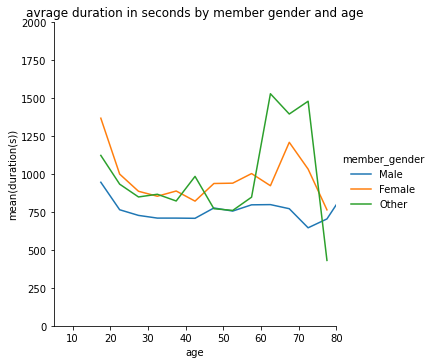

In [56]:
#plt.figure(figsize=[10,7])
bin_edges = np.arange(5, bike_df['age'].max()+5, 5)
g = sb.FacetGrid(data = bike_df, hue = 'member_gender', size = 5)
g.map(mean_poly, "age", "duration_sec", bins = bin_edges)
g.set_ylabels('mean(duration(s))')
plt.title('avrage duration in seconds by member gender and age')
g.add_legend()

**comments on the plot :**
    - as we can see Female on avarege take a longer trip

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


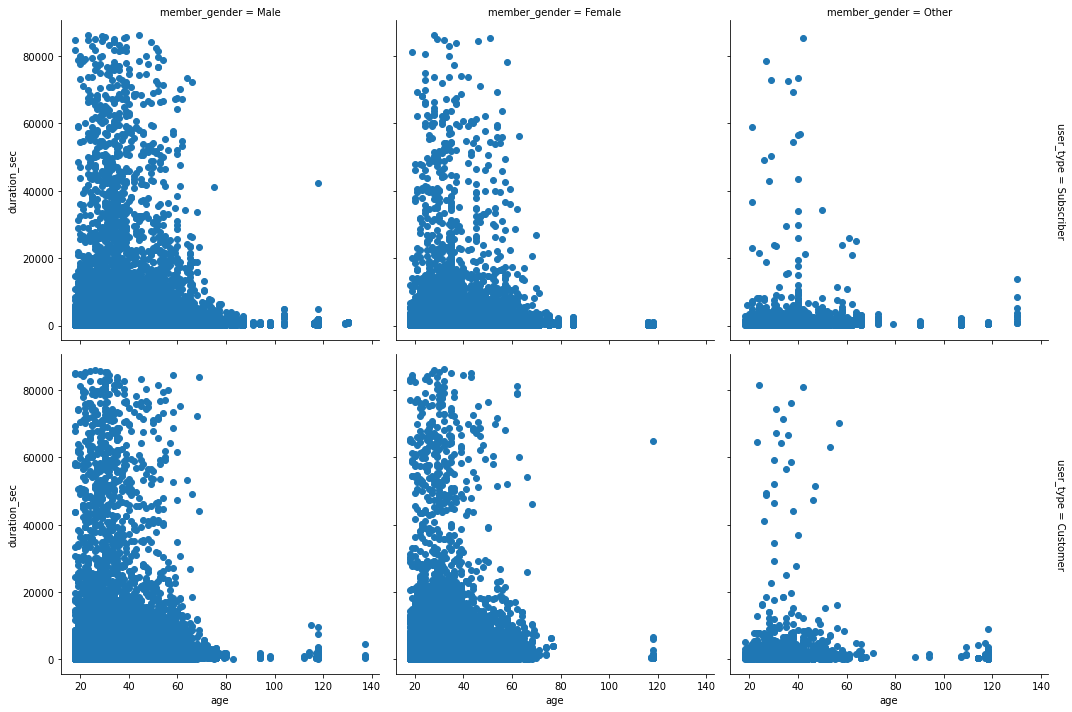

In [46]:
g = sb.FacetGrid(data = bike_df, col = 'member_gender', row = 'user_type', size = 5,
                margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec')

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(15.0, 100.0)

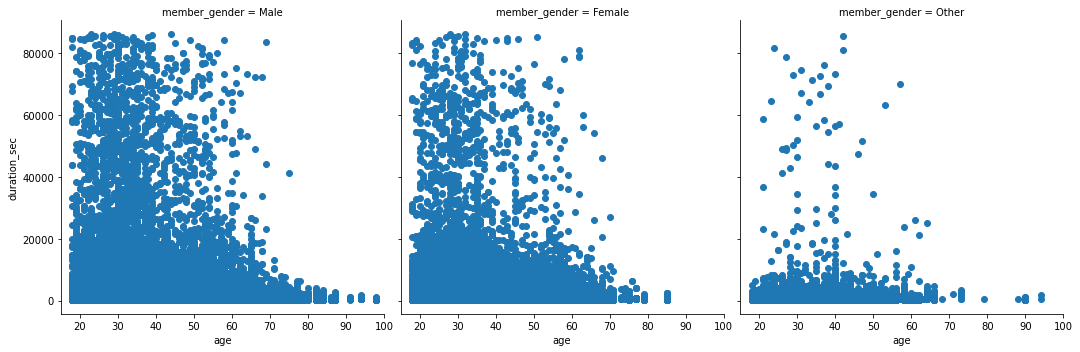

In [47]:
g = sb.FacetGrid(data = bike_df, col = 'member_gender', size = 5,
                margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec')
plt.xlim(15,100)


**comments on the plot :**
    - as we can from the scatter plot however the gender bike renter duration follow tha same pattern
    